## Note: Almost every algorithm in this notebook can be used for both binary and multi-classification, but for the sake of the example (and plotting), we will divide them into these two categories 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import make_classification

## Multi-classification examples

### Generate mock data 

In [2]:
x,y = make_classification(n_samples=1000, n_classes=3, n_informative=4)

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

### 1) Decision tree

In [10]:
## Params
max_leaf = 5
max_features = 4
max_depth = 5
estimators = 5

In [11]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf, max_features=max_features, max_depth=max_depth)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=4, max_leaf_nodes=5)

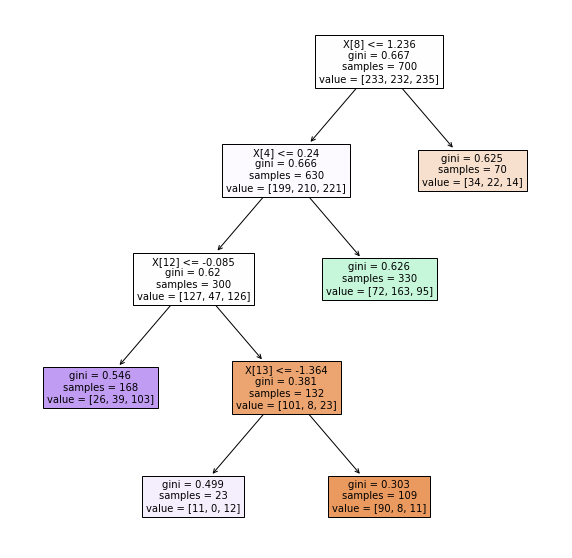

In [12]:
fig = plt.figure(figsize=(10,10))

tree.plot_tree(dt, filled=True, fontsize=10) 

plt.show()

### 2) Random forest (collection of trees)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = max_depth, n_estimators = estimators, max_leaf_nodes = max_leaf, max_features=max_features)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=4, max_leaf_nodes=5,
                       n_estimators=5)

#### As we can see, random forest is a collection of decision trees. Each tree root is decided by selecting 2 random features and comparing its gini. Then, the one with the smaller number becomes the root and we do the same thing for each tree

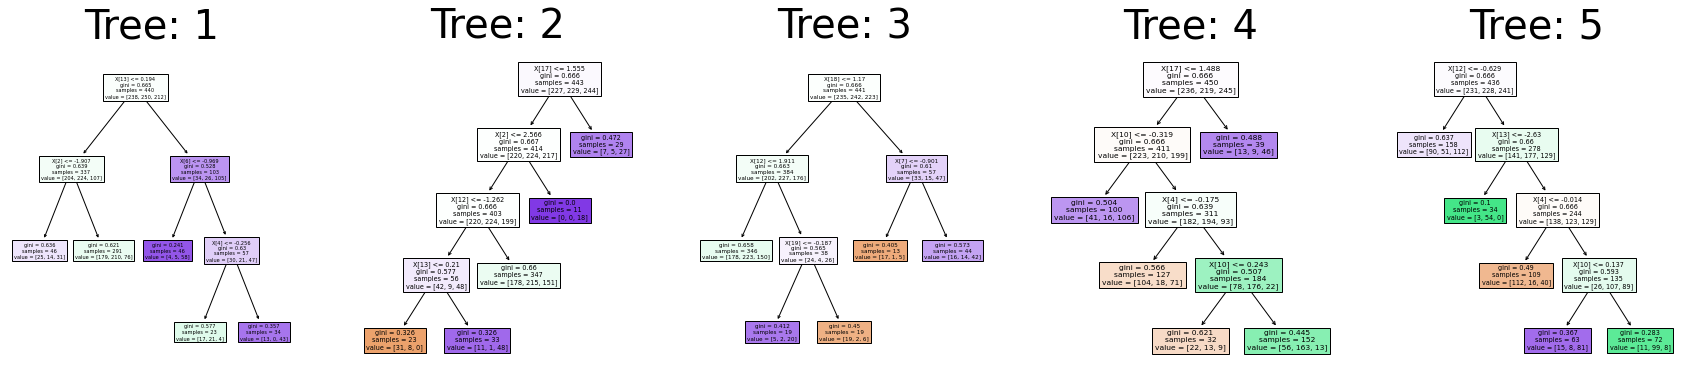

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = estimators, figsize = (30,6))

for index in range(estimators):
    tree.plot_tree(rf.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Tree: ' + str(index+1), fontsize = 40)
plt.show()

### 3) K-nearest-neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_jobs=-1, n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

#### K=10 is optimal K

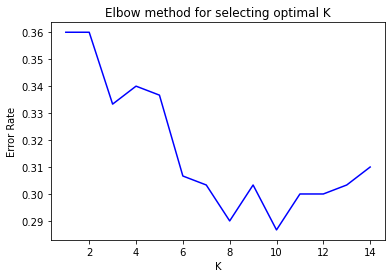

In [41]:
plt.plot(range(1,15),error_rate,color='b', markerfacecolor='r')
plt.title('Elbow method for selecting optimal K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors = 10)


## Binary classification examples

In [27]:
bx,by = make_classification(n_samples=1000, n_features=4)

In [28]:
bx_train, bx_test, by_train, by_test = train_test_split(bx,by, test_size=0.3, random_state=1)

### 1) Logistic-Regression

In [30]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

logr.fit(x_train, y_train)

LogisticRegression()

#### Visualization example

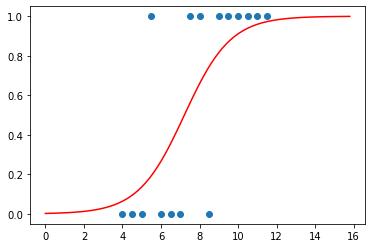

In [31]:
x_vis = np.arange(4,12,0.5)
y_vis = np.array([0,0,0,1,0,0,0,1,1,0,1,1,1,1,1,1])

x_vis = x_vis.reshape(-1,1)
logr.fit(x_vis, y_vis)

x_nums = np.arange(0, 16, 0.2)
probs = []
for i in x_nums:
    loss, win = logr.predict_proba([[i]])[0]
    probs.append(win)
    
plt.scatter(x_vis,y_vis)
plt.plot(x_nums, probs, color = 'red')

### 2) SVM (Support Vector Machine)

### 3) Naive bayes